# z검정 with FIFA22 dataset

## Contents
- 1. 데이터 불러오기 
- 2. 가설설정 및 표본평균 확인
- 3. FIFA22 선수 몸무게 이용 z 검정
    - 3-1. 시각화
    - 3-2. 요약
    - 3-3. 통계적으로
- 4. FIFA22 선수 몸무게 이용 z 검정

## 1. 데이터 불러오기

In [1]:
# 라이브러리
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [2]:
## 출처 : 캐글
## https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset
data = pd.read_csv('./data/players_22.csv')

In [64]:
data.shape

(19239, 110)

In [3]:
# 필요한 데이터만 
df = data[['short_name', 'long_name','height_cm', 'weight_kg','overall']]

In [4]:
df[df['long_name'].str.contains('손흥민')]

,short_name,long_name,height_cm,weight_kg,overall
13,H. Son,손흥민 孙兴慜,183,78,89


## 2. 가정(가설)설정 및 표본 평균 확인
- 축구선수들의 평균 몸무게가 76kg, 표준편차 7kg 이라고 알려져있다고 하겠다. (그냥 임의의 몸무게를 넣어봤다. 다른 의미는 없다.)
- 그리고 그 사실이 맞는지 확인하기 위해서 우리는 임의로 축구선수 30명을 찾아서 몸무게를 측정했다고 하겠다.

In [32]:
# 30명 중 능력치 기준 상위 5명
df.sample(n,random_state=7).sort_values('overall', ascending=False)[:5]

,short_name,long_name,height_cm,weight_kg,overall
593,M. Uribe,Andrés Mateus Uribe Villa,182,71,79
830,Luiz Felipe,Luiz Felipe Ramos Marchi,187,80,78
805,D. Calabria,Davide Calabria,177,70,78
971,Diego Llorente,Diego Javier Llorente Ríos,186,76,77
2364,D. Hovorka,David Hovorka,179,73,74


In [70]:
# 모평균과 모표준편차
mu = 76
sigma = 7

# 랜덤하게 30명의 몸무게를 측정
n = 30
samples = df['weight_kg'].sample(n, random_state = 7)

# 샘플의 평균
x_bar = sum(samples)/n
print('샘플의 평균은 {0:.2f}'.format(x_bar))

샘플의 평균은 73.10


- 우리가 뽑은 30명의 평균은 73.1kg이였다. 예상과 일치하는가? 작은가? 많은가? 
- 가정이였던 모집단의 평균 76kg 보다 작다. 그럼 일치하지 않다고, 작다고 하면되는가? 판단하면 되는가? 
- 보는 사람에 따라서 겨우 2.9kg인데 뭐 이렇게 이야기할 수도 있고, 2.9kg이면 너무 차이가 크지 않나. 이럴수도 있을 것 같다. 

- 시각적으로 확인하면 좋을 것 같다. 


## 3. FIFA22 선수 몸무게 이용 z 검정

### 3-1. 시각화

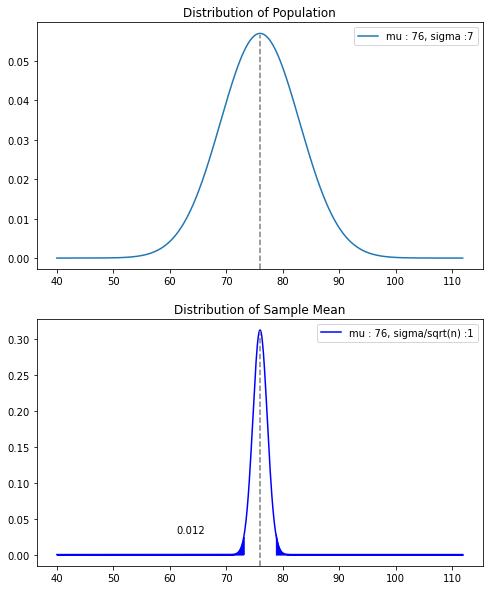

In [46]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,1, figsize=(8,10))

x1 = np.arange(40,112,0.1)
y1 = norm(mu, sigma).pdf(x1)             # 모집단의 분포 , norm 정규분포 , pdf 확율분포 함수 
ax[0].set_title('Distribution of Population')
ax[0].plot(x1,y1, label='mu : ' + str(mu) + ', '+ 'sigma :' + str(sigma))
ax[0].axvline(mu,0,0.95, color='grey', linestyle='--')
ax[0].legend()


x2 = np.arange(40,112,0.1)   
y2 = norm(mu, sigma/np.sqrt(n)).pdf(x2)   # 표본평균의 분포 

proba = round(norm(mu, sigma/np.sqrt(n)).cdf(x_bar),3)  
sd_SampleMean = int(sigma/np.sqrt(n))
ax[1].set_title('Distribution of Sample Mean')
ax[1].text(x_bar-12, 0.03, str(proba))
ax[1].plot(x2,y2, color='b', label = 'mu : ' + str(mu) + ', ' + 'sigma/sqrt(n) :' + str(sd_SampleMean))
ax[1].vlines(x_bar, 0, norm(mu, sigma/np.sqrt(n)).pdf(x_bar), color='b')
ax[1].axvline(mu,0,0.95, color='grey', linestyle='--')
ax[1].fill_between(x2[0:331], y2[0:331], color='b')
ax[1].fill_between(x2[388:], y2[388:], color='b')
ax[1].vlines(x_bar, 0, norm(mu, sigma/np.sqrt(n)).pdf(mu+x_bar), color='b')
ax[1].legend()

plt.show()

- 위는 모집단의 분포이고(어떤 분포든 상관없다. 임의로 정규분포로 그림), 아래는 모집단에서 나온 표본들의 평균에 의해 만들어지는 분포이다. 
    - 모집단의 정보를 모두 알고 있기 때문에(안다고 가정했기 때문에), 중심극한정리에 의해서 표본의 평균의 분포를 알 수 있다. (중심극한정리가 궁금하면)
    - 정규분포이기 때문에, 우리는 표본평균값의 위치에 대한 확율값을 구할 수 있다. 왼쪽 극단(음의 무한)에서 표본의 평균까지의 확율은 0.012 (1.2%)이다. 
        - 파이썬 함수는 scipy stats 모듈의 norm(평균, 표준편차).cdf(위치값)를 활용한다. (cdf : 누적확율분포) 
    - 정규분포는 종모양의 대칭형태를 하고 있기 때문에, 반대쪽 넓이도 동일하다는 것을 알 수 있고, 그 확율값도 역시 0.012가 된다. 
    
- 우리가 구한 표본의 평균은 아래 분포상에 있는 무수히 많은 경우 중 하나이다. 
    - 가정의 모집단에서 데이터가 뽑혔다면, 무수히 많은 표본을 뽑을 수 경우 중 95% 범위 안에서 뽑혔을 것이다. 
        - 100%에서 95%를 제외한 나머지가 5%이니까, 통계적으로 5%는 낮은 확율이라고 한다. (더 가혹하게 하고 싶다면 99% 99.9%로 올리면 된다. 분석가 혹은 연구자의 상황에 맞는 판단)
    - 가정의 모집단에서 데이터가 뽑히지 않았다면, 무수히 많은 표본을 뽑는 경우 중 95% 범위 밖에서 뽑혔을 것이다.

- 표본평균의 분포를 표준화하는 것이다. 표준화된 분포 안에서 표본평균이 어디에 위치하는지 보기 위해서 측정했던 표본의 평균도 같이 표준화한다. 


In [71]:
z = (x_bar - mu)/(sigma/np.sqrt(n))
print('샘플의 통계량 z는 {0:.2f}'.format(z))

샘플의 통계량 z는 -2.27


- 이것도 시각화 해보면

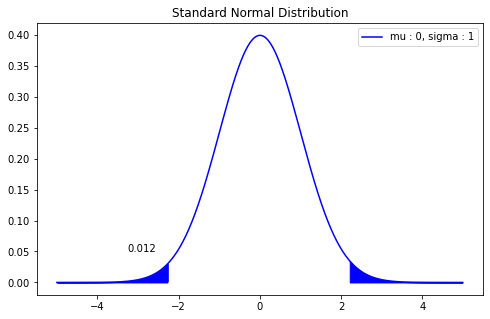

In [72]:
plt.figure(figsize=(8,5))
x = np.arange(-5, 5, 0.01)
y = norm(0,1).pdf(x)     # 표준정규분포

# 정규분포
plt.plot(x,y, color='b', label = 'mu : 0, sigma : 1')
# 통계량 
z = (x_bar - mu)/(sigma/np.sqrt(n))
# 통계량으로 p-value , cdf : 누적확율분포
proba = round(norm(0,1).cdf(z),3)  
# 통계량 위치
plt.vlines(z, 0, norm(0,1).pdf(z), color='b')
# plt.axvline(z, 0,1)
plt.title('Standard Normal Distribution')
plt.fill_between(x[0:(500-227)], y[0:(500-227)], color='b')
plt.fill_between(x[721:], y[721:], color='b')
plt.text(z-1, 0.05, str(proba))
plt.legend()

plt.show()

- 정규분포의 모양은 바뀌었지만, 통계량으로 구한 극단의 확율값이 동일한 것을 확인할 수 있다. 
- 또한, 표준화를 하게되면, 평균이 0, 표준편차가 1이기 때문에, 통계량으로 바로 데이터가 어디에 위치했는지 알 수 있는 장점이 생긴다. 
- 앞선 포스팅에서 1 표준편차 안에 68.26%, 2표준편차 안에 95.44%, 3표준편차 안에 99.7%의 데이터가 있다는 것을 보였었다. 
- 그렇다면 통계량이 -2.27이기 때문에, 2표준편차 밖에 있는 값이라는 것을 알 수 있다. 즉 95.44% 밖에 있는 데이터라는 의미이고, 또 다른말로는 이 값이 나올 확율은 4.66% 안에 있다는 말이 된다. 
- 즉 유의수준이 5%였다면, 신뢰구간이 95%였다면, FIFA22 축구선수의 평균 몸무게는 76kg이 아니다라고 이야기 할 수 있다. 
- 이것이 바로 z-검정이다. 

### 3-2. 요약
- 우리는 중심극한정리에 의해서 모평균의 정보가 있다면(가정(가설)에 의해서), 표본의 분포를 알 수 있게 된다. 
    - 모집단의 분포가 어떤 분포이든 상관없이, 표본의 평균의 분포는 x_bar ~ N (mu, (sigma/np.sqrt(n))^2 )
    - 표본의 평균의 분포에서 평균은 mu이고, 표준편차는 표준오차라고 불리는 sigma/np.sqrt(n)이다. 
- 우리가 뽑은 표본의 평균의 분포상에 어디에 있는지를 안다면, 표준정규분포를 이용해서 확율을 알 수 있게 된다. 
    - (대신 더 극단적으로 갈 확율을 구한다, 연속형 확율분포의 한 점에서 넓이는 없다는 것을 생각)
- 표본의 평균이 분포상에 어디에 있는지를 알아보는 것이 통계량 z 를 구하는 것이다. 
    - 정규분포를 표준화 시킬때, 확율변수에서 평균을 빼고, 표준편차를 나누었던 것을 기억할 것이다.
    - 통계량 z는 결국 표본의 평균을 정규화한 값이다. 
- 표본의 평균의 분포에서 통계량 z를 구하고, 표준정규분포에서의 위치와 확율을 통해서 연구자가 정한 유의수준에 따라서 가설의 참, 거짓을 판정한다.

### 3-3. 통계적으로
- 여기서 가설은 
    - H0 (귀무가설) : 축구선수들의 몸무게의 평균이 76kg이다. 
    - H1 (대립가설) : 축구선수들의 몸무게의 평균이 76kg이 아니다.  

- 방법2가지
    - 1. 통계량의 확율값 이용 
    - 2. 통계량의 임계값 이용 

- 판정기준1 : 귀무가설이 맞다면, 통계량은 신뢰구간 (1-유의수준)안에 존재할 것이다. 
    - 양측검정 유의수준 0.1 보다, 통계량에서 극단에 이르는 확율의 값이 더 작은지 확인
    - 양측검정 유의수준 0.05 보다, 통계량에서 극단에 이르는 확율의 값이 더 작은지 확인
    - 양측검정 유의수준 0.01 보다, 통계량에서 극단에 이르는 확율의 값이 더 작은지 확인 

- 판정기준2 : 귀무가설이 맞다면, 통계량은 임계값보다 작을 것이다. 
    - 양측검정 유의수준 0.1의 critical point는 1.646
    - 양측검정 유의수준 0.05의 critical point는 1.96   (2 표준편차 사이에 95.44% 데이터가 있었다.)
    - 양측검정 유의수준 0.01의 critical point는 2.576 

- 통계량 z 가 -2.27이고, 그에 대한 양측극단값의 확율은 0.024(2.4%)이므로 양측검정 유의수준 0.05에서 귀무가설인 축구선수들의 몸무게의 평균이 76kg이다라는 귀무가설을 기각한다.
- 축구선수들의 몸무게의 평균이 76kg이 아니라는 대립가설을 채택한다. 
    - 통계량 z가 음수인데?? 표준정규분포가 0을 평균으로 양쪽을 대칭이기 때문에 -2.76을 보고도 판정할 수 있다. 

## 4. FIFA 22 선수 키 이용 z 검정
- 키를 가지고 한번 더 해보자.
- FIFA22 축구선수의 키의 평균이 178cm, 표준편차가 7cm 로 알려져 있다고 하자.
- 이를 알아보기 위해서 축구선수 30명의 키를 측정해보았다고 하자. 
- 아래는 축구선수 샘플의 평균과 그 통계량을 구한 것이다. 

In [52]:
mu = 178
sigma = 7

n = 30
samples = df['height_cm'].sample(n, random_state=7)

x_bar = sum(samples)/n

print('샘플의 평균은 {:.2f}'.format(x_bar))

샘플의 평균은 179.37


In [53]:
# z 통계량
z = (x_bar - mu)/(sigma/np.sqrt(n))

print('통계량은 {:.2f}'.format(z))

통계량은 1.07


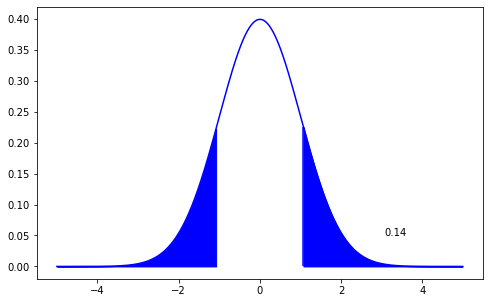

In [58]:
plt.figure(figsize=(8,5))
x = np.arange(-5, 5, 0.01)
y = norm(0,1).pdf(x)

# 정규분포
plt.plot(x,y, color='b')
# 통계량 
z = (x_bar - mu)/(sigma/np.sqrt(n))
# 통계량으로 p-value , cdf : 누적확율분포
p_value = round(1 - norm(0,1).cdf(z), 2)
# 통계량 위치
plt.vlines(z, 0, norm(0,1).pdf(z), color='b')
# plt.axvline(z, 0,1)
plt.fill_between(x[500+107:], y[500+107:], color='b')
plt.fill_between(x[:393], y[:393], color='b')
plt.text(z+2, 0.05, str(p_value))

plt.show()

## FIFA22 선수 키에 대한 가설검정
- 여기서 가설은 
    - H0 (귀무가설) : 축구선수들의 키의 평균이 178cm이다. 
    - H1 (대립가설) : 축구선수들의 키의 평균이 178cm이 아니다.  
    
- 방법2가지
    - 1. 통계량의 확율값 이용 
    - 2. 통계량의 임계값 이용 
    
- 판정기준1 : 귀무가설이 맞다면, 통계량은 신뢰구간 (1-유의수준)안에 존재할 것이다. 
    - 양측검정 유의수준 0.1 보다, 통계량에서 극단에 이르는 확율의 값이 더 작은지 확인
    - 양측검정 유의수준 0.05 보다, 통계량에서 극단에 이르는 확율의 값이 더 작은지 확인
    - 양측검정 유의수준 0.01 보다, 통계량에서 극단에 이르는 확율의 값이 더 작은지 확인 

- 판정기준2 
    - 양측검정 유의수준 0.1의 critical point는 1.646
    - 양측검정 유의수준 0.05의 critical point는 1.96
    - 양측검정 유의수준 0.01의 critical point는 2.576

- 통계량 z 가 1.07이고, 그에 대한 양측극단값의 확율은 0.28(28%)이므로 양측검정 유의수준 0.1에서 조차도 귀무가설인 축구선수들의 키의 평균이 178cm이다라는 귀무가설을 기각하지 못한다. (작은 확율이라고 보기 어렵다.)
- 따라서 FIFA22 축구선수들의 키의 평균이 178cm라는 귀무가설을 채택한다. 
    - 그러므로 우리의 표본으로 보았을 때, 통계적으로 축구선수의 평균키가 178cm 맞다고 판정한다.  